# Exam Project | Face Recognizer
By **Pernille Lørup & Stephan Djurhuus**  
Institute **CPHBusiness**  

Education **Software Development**  
Elective **Artificial Intelligence**  

## The Content
## The Theory
## The Source

In [1]:
import cv2
import numpy as np

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Dropout

In [2]:
import sys
sys.path.append('../')
from FaceDetector import FaceDetector
from FaceRecognizer import FaceRecognizer
from DataGenerator import DataGenerator
from Utilities import Displayer

In [3]:
classes = ['dad', 'mom']

In [4]:
dad_path = '../data/face-data/PersonGroup/Family3-Man'
mom_path = '../data/face-data/PersonGroup/Family3-Lady'

(train_dad_data, test_dad_data) = DataGenerator.generate(dad_path, 100, label=0, test_size=.2)
(train_mom_data, test_mom_data) = DataGenerator.generate(mom_path, 100, label=1, test_size=.2)

(train_images, train_labels) = DataGenerator.merge_shuffle([train_dad_data, train_mom_data])
(test_images, test_labels) = DataGenerator.merge_shuffle([test_dad_data, test_mom_data])

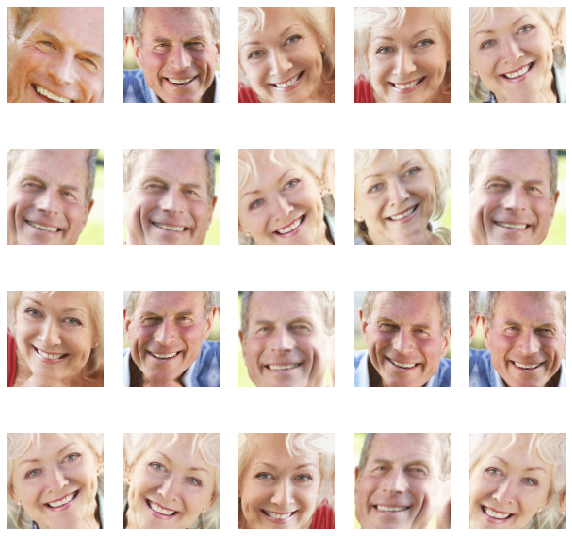

In [5]:
Displayer.images(train_images[200:], 20)

In [6]:
model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    Dropout(.2),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'), # softmax no go
    Dense(2)
])

In [7]:
faceRecognizer = FaceRecognizer(classes, model=model)
#faceRecognizer.train_model((train_images, train_labels), (test_images, test_labels), epochs=10)

In [8]:
#faceRecognizer.save_model('../models/sequential_model_18-5_fam3_acc90')
faceRecognizer.load_model('../models/sequential_model_18-5_fam3_acc90')

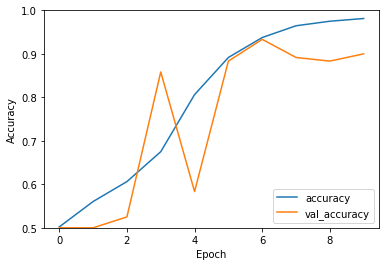

In [9]:
Displayer.acc_history(faceRecognizer.history)

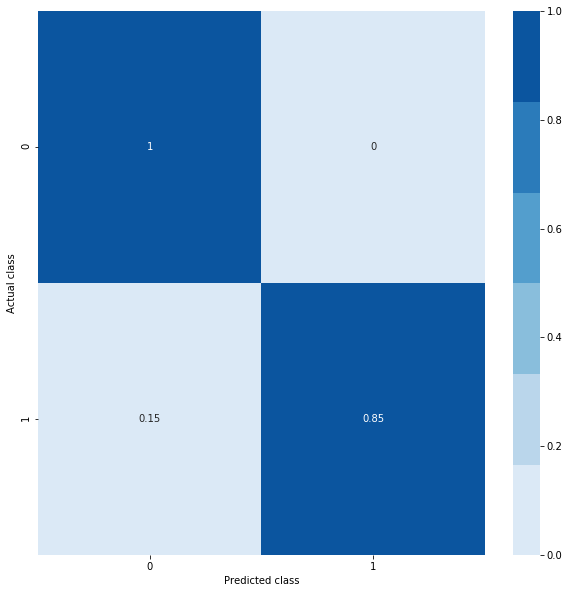

In [10]:
# ...
predictions = faceRecognizer.recognize_many(test_images)
Displayer.conf_matrix(predictions, test_labels)

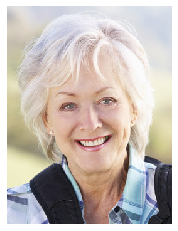

mom


In [17]:
image_path = '../data/face-data/PersonGroup/Family3-Lady/Family3-Lady1.jpg'
image = cv2.imread(image_path)

prediction = faceRecognizer.recognize(image)
Displayer.image(image, bgr=True)
print(prediction)

___

In [12]:
image_path = '../data/face-data/identification3.jpg'
image = cv2.imread(image_path)

faceDetector = FaceDetector('FACE_DEFAULT')
faces_data = faceDetector.face_details(image)

In [13]:
prediction_data = faceRecognizer.face_predictions(faces_data)

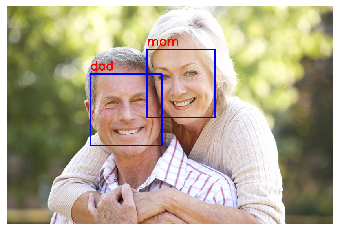

In [14]:
Displayer.mark_predictions(image, prediction_data, classes)